In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import copy
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import tensorflow as tf

2024-07-06 10:05:38.768526: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [121]:
from sklearn.linear_model import LinearRegression

In [122]:
dataset_cols = ['bike_count', 'hour', 'temp', 'humidity', 'wind', 'visibility', 'dew_point_temp', 'radiation','rain', 'snow', 'functional']
df = pd.read_csv('SeoulBikeData.csv',encoding='ISO-8859-1')
df.to_csv('SeoulBikeData_utf8.csv', index=False, encoding='utf-8')

In [123]:
df = pd.read_csv('SeoulBikeData_utf8.csv')
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [124]:
# we are going to drop some cols
df.drop(['Date', 'Holiday', 'Seasons'],axis = 1,inplace = True)

In [125]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes


In [126]:
df.columns = dataset_cols
df.head(2)

,bike_count,hour,temp,humidity,wind,visibility,dew_point_temp,radiation,rain,snow,functional
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes


In [127]:
df['functional'] = (df['functional'] == 'Yes').astype(int)
df.head()

,bike_count,hour,temp,humidity,wind,visibility,dew_point_temp,radiation,rain,snow,functional
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1


In [128]:
df = df[df['hour'] == 12]
df.head()
df = df.drop(['hour'],axis = 1)

In [129]:
df.head()

,bike_count,temp,humidity,wind,visibility,dew_point_temp,radiation,rain,snow,functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


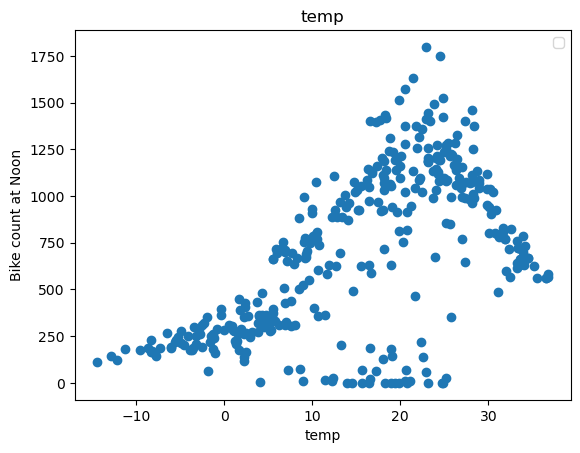

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


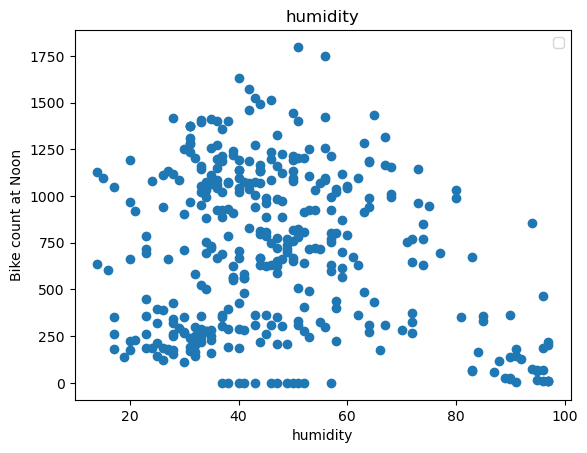

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


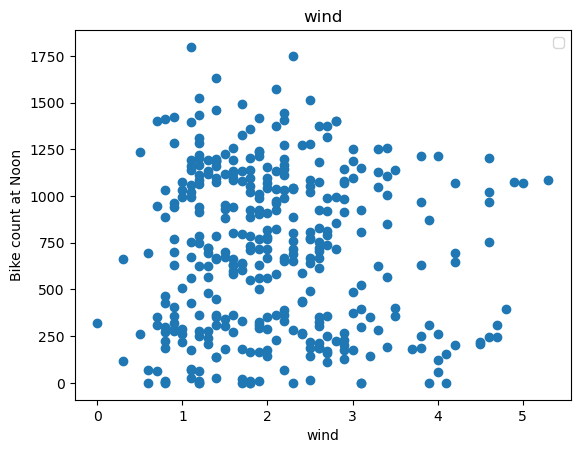

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


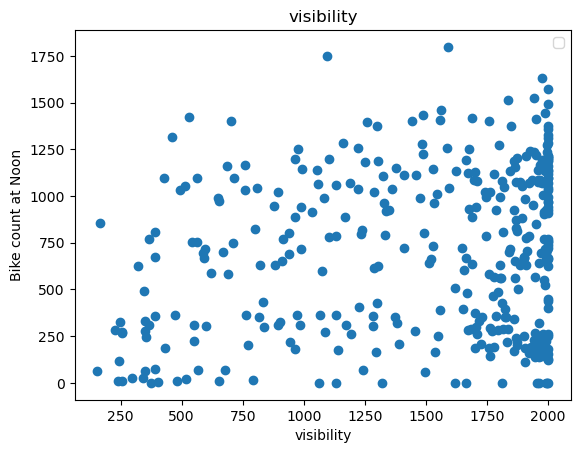

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


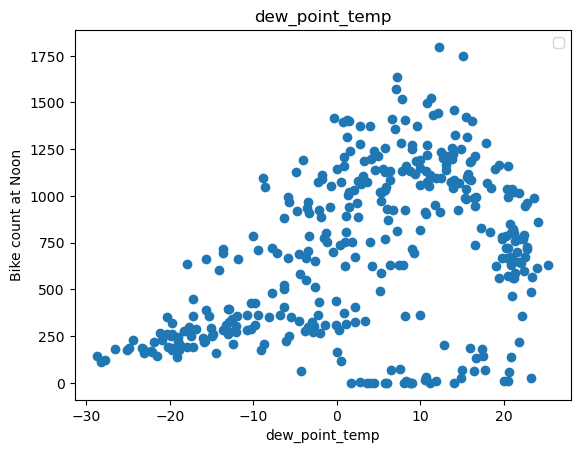

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


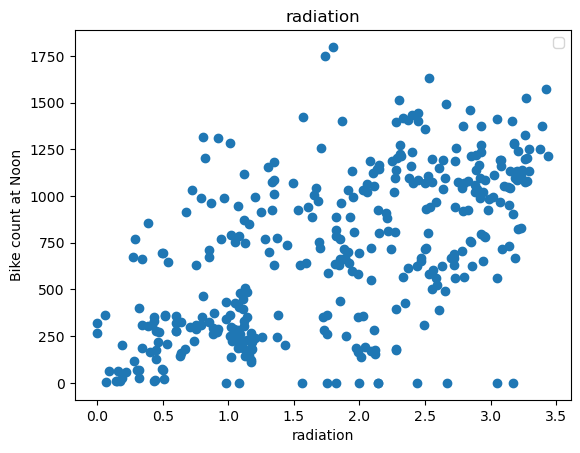

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


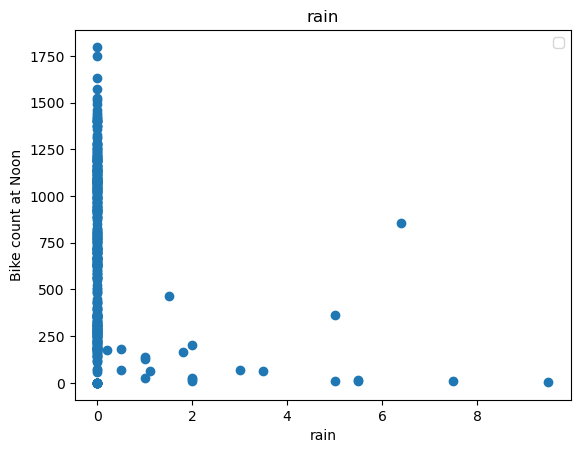

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


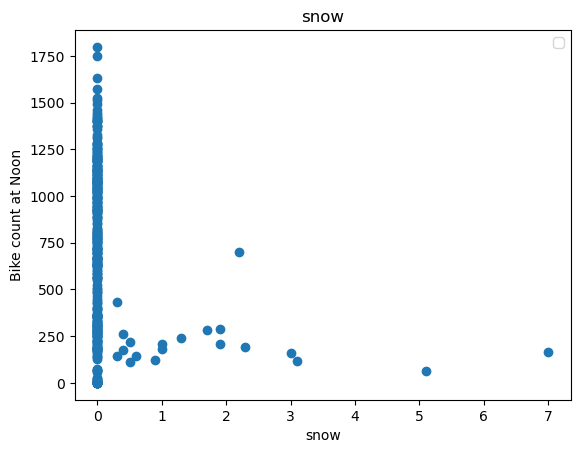

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


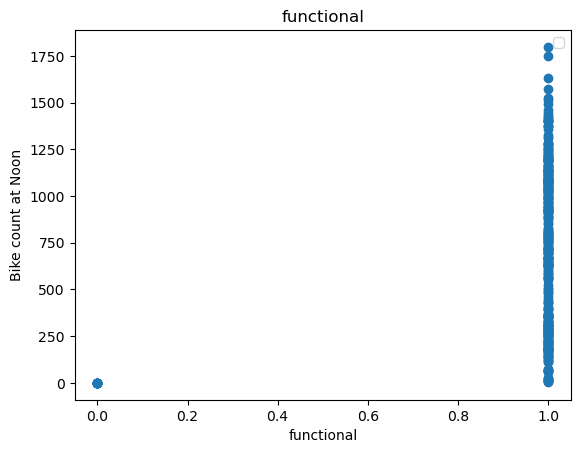

In [130]:
for label in df.columns[1:]:
    plt.scatter(df[label],df['bike_count'])
    plt.title(label)
    plt.ylabel('Bike count at Noon')
    plt.xlabel(label)
    plt.legend()
    plt.show()

In [131]:
df = df.drop(['wind','visibility','functional'],axis = 1)

In [132]:
df.head()

,bike_count,temp,humidity,dew_point_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


# Splitting data into train, valid, test

In [133]:
train,val,test = np.split(df.sample(frac=1),[int(0.6*len(df)), int(0.8*len(df))])

/opt/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [150]:
def get_xy(dataframe, y_label, x_labels = None):
    dataframe = copy.deepcopy(dataframe)
    #if not x_labels:
    if x_labels is None:
        X = dataframe[[c for c in dataset.columns if c!=y_label]].values
    else:
        if len(x_labels) == 1:
            X = dataframe[x_labels[0]].values.reshape(-1,1)
        else:
            X = dataframe[x_labels].values

    y = dataframe[y_label].values.reshape(-1,1)
    data = np.hstack((X,y))

    return data, X, y
    

In [151]:
_, X_train_temp, y_train_temp = get_xy(train, 'bike_count', x_labels = ['temp'])
_, X_val_temp, y_val_temp = get_xy(val, 'bike_count', x_labels = ['temp'])
_, X_test_temp, y_test_temp = get_xy(test, 'bike_count', x_labels = ['temp'])

In [152]:
# model fitting

temp_reg = LinearRegression()
temp_reg.fit(X_train_temp, y_train_temp)

LinearRegression()

In [153]:
print(temp_reg.coef_, temp_reg.intercept_)

[[20.29131496]] [400.46462403]


In [154]:
temp_reg.score(X_test_temp,y_test_temp)

0.2598091778833841

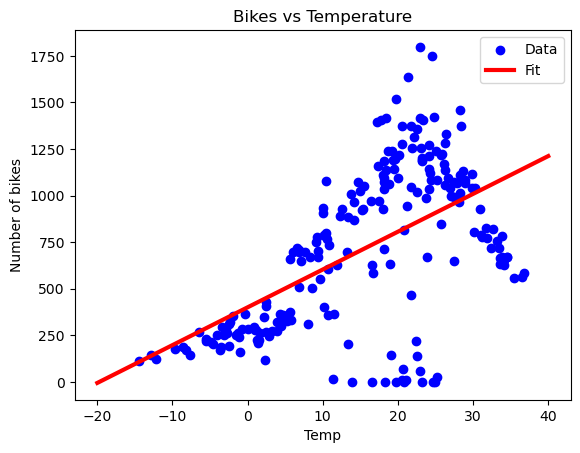

In [155]:
plt.scatter(X_train_temp,y_train_temp, label = 'Data', color = 'blue')
X = np.linspace(-20, 40, 100).reshape(-1, 1)
plt.plot(x, temp_reg.predict(X), label = 'Fit', color = 'red', linewidth = 3)
plt.legend()
plt.title('Bikes vs Temperature')
plt.ylabel('Number of bikes')
plt.xlabel('Temp')
plt.show()

# multiple Linear Regression

In [156]:
df.columns

Index(['bike_count', 'temp', 'humidity', 'dew_point_temp', 'radiation', 'rain',
       'snow'],
      dtype='object')

In [157]:
train,val,test = np.split(df.sample(frac=1),[int(0.6*len(df)), int(0.8*len(df))])
_, X_train_all, y_train_all = get_xy(train, 'bike_count', x_labels = df.columns[1:])
_, X_val_all, y_val_all = get_xy(val, 'bike_count', x_labels = df.columns[1:])
_, X_test_all, y_test_all = get_xy(test, 'bike_count', x_labels = df.columns[1:])

/opt/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [158]:
all_reg = LinearRegression()
all_reg.fit(X_train_all,y_train_all)

LinearRegression()

In [159]:
all_reg.score(X_test_all,y_test_all)

0.41381214051747306

In [198]:
y_pred_lr = all_reg.predict(X_test_all)

# Regression with neural network

In [160]:
temp_normalizer = tf.keras.layers.Normalization(input_shape = (1,), axis = None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [161]:
temp_nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(1)
])

In [162]:
temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss = 'mean_squared_error' )

In [168]:
history = temp_nn_model.fit(
    X_train_temp.reshape(-1), y_train_temp,
    verbose=0,
    epochs = 1000,
    validation_data=(X_val_temp,y_val_temp)
)

In [166]:
def plot_loss(history):
    plt.plot(history.history['loss'],label = 'loss')
    plt.plot(history.history['val_loss'],label = 'val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend()
    plt.grid(True)
    plt.show()

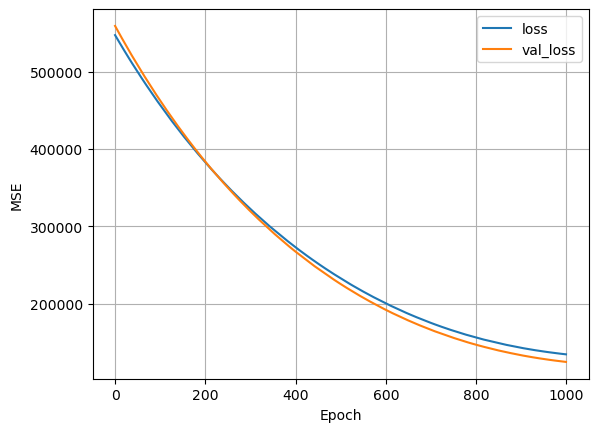

In [169]:
plot_loss(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


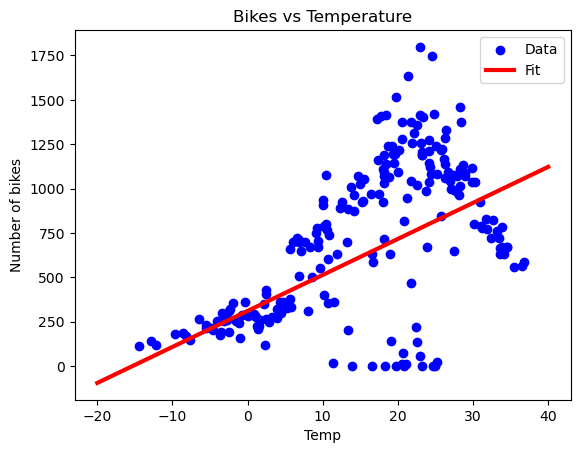

In [170]:
plt.scatter(X_train_temp,y_train_temp, label = 'Data', color = 'blue')
X = np.linspace(-20, 40, 100).reshape(-1, 1)
plt.plot(x, temp_nn_model.predict(X), label = 'Fit', color = 'red', linewidth = 3)
plt.legend()
plt.title('Bikes vs Temperature')
plt.ylabel('Number of bikes')
plt.xlabel('Temp')
plt.show()

# Nural network

In [177]:
nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(32,activation = 'relu'),
    tf.keras.layers.Dense(32,activation = 'relu'),
    tf.keras.layers.Dense(1),
])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss = 'mean_squared_error')

In [178]:
history = nn_model.fit(
    X_train_temp,y_train_temp,
    verbose = 0,
    epochs = 100, 
    validation_data = (X_val_temp,y_val_temp),
)

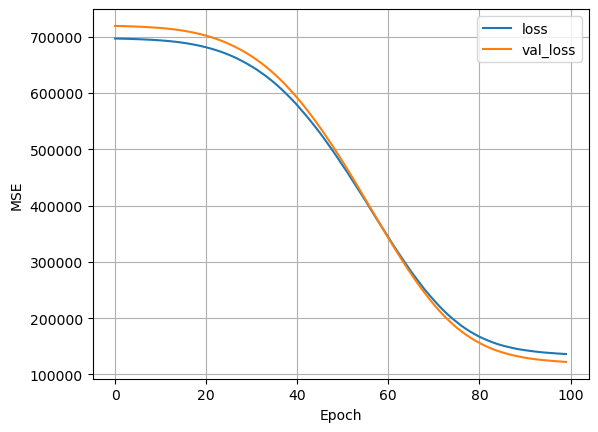

In [179]:
plot_loss(history)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x14ce136a0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


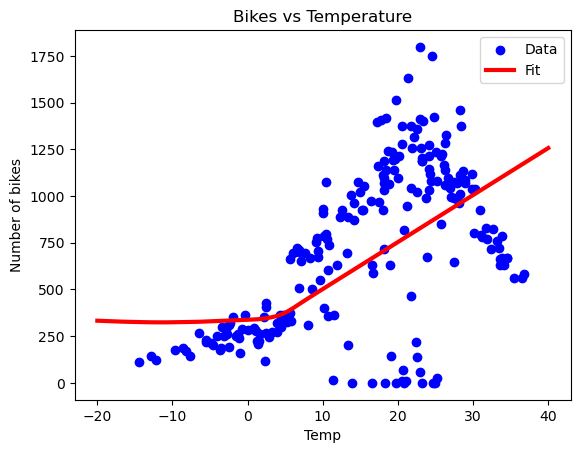

In [180]:
plt.scatter(X_train_temp,y_train_temp, label = 'Data', color = 'blue')
X = np.linspace(-20, 40, 100).reshape(-1, 1)
plt.plot(x, nn_model.predict(X), label = 'Fit', color = 'red', linewidth = 3)
plt.legend()
plt.title('Bikes vs Temperature')
plt.ylabel('Number of bikes')
plt.xlabel('Temp')
plt.show()

In [206]:
# all normalizer
all_normalizer = tf.keras.layers.Normalization(input_shape = (6,), axis = -1)
all_normalizer.adapt(X_train_all)

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [210]:
nn_model = tf.keras.Sequential([
    all_normalizer,
    tf.keras.layers.Dense(32,activation = 'relu'),
    tf.keras.layers.Dense(32,activation = 'relu'),
    tf.keras.layers.Dense(1),
])

In [211]:
# Compile the model
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss = 'mean_squared_error')

In [212]:
history = nn_model.fit(
    X_train_all, y_train_all,
    verbose=0,
    epochs=100,
    validation_data=(X_val_all, y_val_all)
)

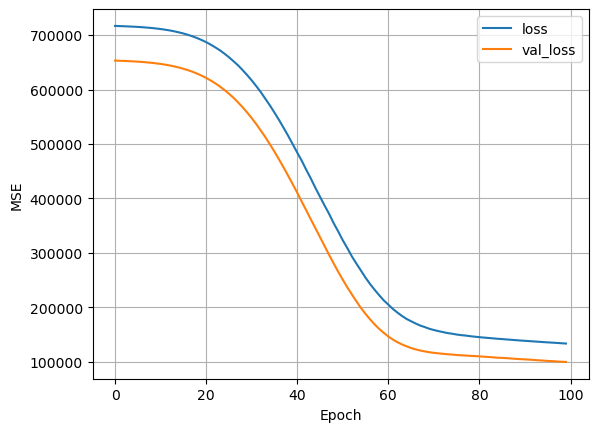

In [213]:
plot_loss(history)

In [214]:
# calclate the mse for both linear reg and nn

y_pred_lr = all_reg.predict(X_test_all)
y_pred_nn = nn_model.predict(X_test_all)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [215]:
def MSE(y_pred, y_real):
   return np.square(y_pred - y_real).mean()

In [216]:
MSE(y_pred_lr, y_test_all)

90566.21568935152

In [217]:
MSE(y_pred_nn, y_test_all)

120791.1780210469

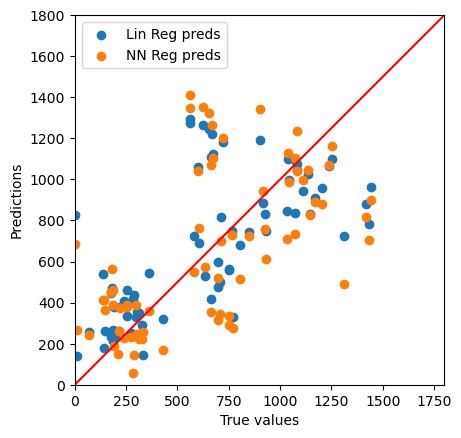

In [221]:
# plotting both

ax = plt.axes(aspect = 'equal')
plt.scatter(y_test_all, y_pred_lr, label = 'Lin Reg preds')
plt.scatter(y_test_all, y_pred_nn, label = 'NN Reg preds')
plt.xlabel('True values')
plt.ylabel('Predictions')
lims = (0,1800)
plt.xlim(lims)
plt.ylim(lims)
plt.legend()
_ = plt.plot(lims, lims, c = 'red')